# HW6

## NAME: Yuhao Wang
## UNI: yw3204

### Problem 1

step 0: A, B, C, D, E, F

step 1: {A, B}, C, D, E, F

step 2: {A, B}, C, D, {E, F}

step 3: {A, B}, C, {D, E, F} 

step 4: {A, B, C}, {D, E, F} 

step 5: {A, B, C, D, E, F} 

### Problem 2

1. Multinomial distribution.

2. We first calculate the proportions of both spam and regular emails in the entire mails and treat them as the probabilty of spam and regular emails. Then we train the unigram, bigram and trigram models sequentially on both spam and regular emails seperately. To train the unigram model, we simply calculate the frequency for each word. To train the bigram model, we calculate the frequency of each continuous pair and use it to calculate the probability of each word condition on its previous word according to the Bayes' rule. Similarly, to train the trigram model, we calculate the frequency of each trigram and use it to claculate the probability of each word condition on its previous two words.  

3. We calculate the probabilty of the message belonging to spam emails or regular emails and classify it as the group having the higher probability for the message. To calculate the probability of being a spam email, using the Bayes' rule it can be shown that the probability is proportional to the prior probabilty of spam emails multiplied by a conditional probability, which is the product of the probabilty of the first word from the unigram model, the conditional probabilty of the second word given the first word from the bigram model, the conditional probability of the third word given the previous two words from the trigram model, and so on. 

### Problem 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [32]:
# load data
dat = np.loadtxt("histograms.txt", dtype=float)

# check row sum and shape
# np.sum(dat, axis = 1)
# dat.shape

In [33]:
# EM algorithm
def MultinomialEM(H, K, tau):
    n = len(H)
    d = len(H[0])
    
    # eliminate 0s
    for i in range(n):
        H[i][H[i] == 0] = 0.01
    
    # init centroids
    cent_idx = np.random.choice(n, K, replace=False)
    T = np.zeros(shape = [K, d])
    for i in range(K):
        T[i] = H[cent_idx[i]]
    
    Phi = np.zeros(shape = [n, K])
    A = np.zeros(shape = [n, K])
    B = np.zeros(shape = [K, d])
    c = np.ones(K) / K
    
    diff = np.inf
    while diff > tau:   
        A_old = A
        
        # E-step 
        for i in range(n):
            for k in range(K):
                Phi[i][k] = np.exp(np.sum(H[i] * np.log(T[k])))
            d = sum(Phi[i]*c)
            A[i] = c*Phi[i]/d

        # M-step
        c = np.sum(A, axis=0)/n
        for k in range(K):
            b = [0]*16
            for i in range(n):
                b += A[i][k]*H[i]
            B[k] = b
            T[k] = B[k] / sum(B[k])
            
        diff = np.sum(np.absolute(A-A_old))
        return A
    
# helper function
def soft2hard(A):
    b = np.zeros(shape=len(A))
    for i in range(len(A)):
        ind = np.argmax(A[i])
        b[i] = ind+1
    return b

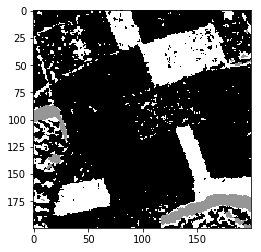

In [42]:
# 2. K = 3, tau = 0.01
dat = np.loadtxt("histograms.txt", dtype=float)
A = MultinomialEM(dat, 3, 0.01)

m = soft2hard(A)
m = m.reshape(200, 200)

# 3.
plt.imshow(m, cmap=cm.Greys_r)
plt.show()

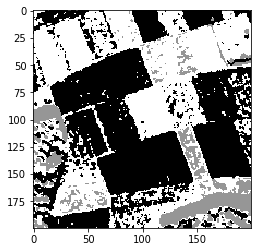

In [43]:
# 2. K = 4, tau = 0.01
dat = np.loadtxt("histograms.txt", dtype=float)
A = MultinomialEM(dat, 3, 0.01)

m = soft2hard(A)
m = m.reshape(200, 200)

# 3.
plt.imshow(m, cmap=cm.Greys_r)
plt.show()

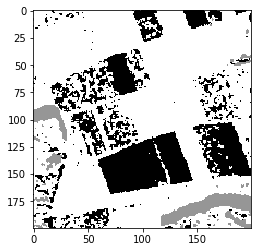

In [44]:
# 2. K = 5, tau = 0.01
dat = np.loadtxt("histograms.txt", dtype=float)
A = MultinomialEM(dat, 3, 0.01)

m = soft2hard(A)
m = m.reshape(200, 200)

# 3.
plt.imshow(m, cmap=cm.Greys_r)
plt.show()

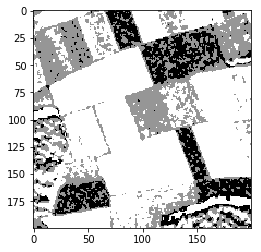